<a href="https://colab.research.google.com/github/andisutrakhusnulkarima/DeepLearning/blob/main/UTS/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
import zipfile
import os

# Mengupload file zip yang berisi dataset
uploaded = files.upload()  # Ini untuk mengupload dataset dari file lokal

# Ambil nama file yang di-upload
uploaded_file_name = list(uploaded.keys())[0]  # Nama file pertama yang di-upload

# Menentukan path file zip yang di-upload
zip_path = f'/content/{uploaded_file_name}'
extracted_folder = '/mnt/data/FishImgDataset/'

# Mengekstrak file zip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

# Cek isi folder setelah ekstraksi
extracted_files = os.listdir(extracted_folder)
print(extracted_files)  # Memastikan file diekstrak dengan benar


Saving FishImgDataset-20250501T213121Z-001.zip to FishImgDataset-20250501T213121Z-001.zip
['FishImgDataset']


In [5]:
# Path gambar yang diekstrak
image_dir = '/mnt/data/FishImgDataset/'

In [6]:
# Augmentasi Data dengan ImageDataGenerator
# Menggunakan augmentasi gambar untuk meningkatkan variasi data pelatihan
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalisasi gambar
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # 80% untuk training, 20% untuk validasi
)


In [7]:
# Membaca gambar dan membagi dataset menjadi data latih dan data uji
train_generator = datagen.flow_from_directory(
    directory=image_dir,
    target_size=(150, 150),  # Resize gambar ke ukuran 150x150
    batch_size=32,
    class_mode='binary',  # Bisa diganti dengan 'categorical' jika ada lebih dari 2 kelas
    subset='training'  # Untuk training
)

validation_generator = datagen.flow_from_directory(
    directory=image_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Untuk validasi
)


Found 10650 images belonging to 1 classes.
Found 2662 images belonging to 1 classes.


In [9]:
# Importing Libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [10]:
# 2. Membangun Model CNN dengan TensorFlow/Keras
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # 'sigmoid' untuk klasifikasi dua kelas
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:

# 3. Kompilasi Model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # Loss function untuk binary classification
    metrics=['accuracy']
)

In [12]:
# 4. Melatih Model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
333/333 ━━━━━━━━━━━━━━━━━━━━ 680s 2s/step - accuracy: 0.9827 - loss: 0.0136 - val_accuracy: 1.0000 - val_loss: 2.1765e-29
Epoch 2/10
333/333 ━━━━━━━━━━━━━━━━━━━━ 646s 2s/step - accuracy: 1.0000 - loss: 7.4864e-23 - val_accuracy: 1.0000 - val_loss: 1.8671e-28
Epoch 3/10
333/333 ━━━━━━━━━━━━━━━━━━━━ 638s 2s/step - accuracy: 1.0000 - loss: 3.1129e-21 - val_accuracy: 1.0000 - val_loss: 9.2315e-29
Epoch 4/10
333/333 ━━━━━━━━━━━━━━━━━━━━ 639s 2s/step - accuracy: 1.0000 - loss: 5.3541e-21 - val_accuracy: 1.0000 - val_loss: 9.9310e-29
Epoch 5/10
333/333 ━━━━━━━━━━━━━━━━━━━━ 643s 2s/step - accuracy: 1.0000 - loss: 7.3139e-21 - val_accuracy: 1.0000 - val_loss: 1.0766e-30
Epoch 6/10
333/333 ━━━━━━━━━━━━━━━━━━━━ 629s 2s/step - accuracy: 1.0000 - loss: 3.8232e-20 - val_accuracy: 1.0000 - val_loss: 3.3113e-28
Epoch 7/10
333/333 ━━━━━━━━━━━━━━━━━━━━ 630s 2s/step - accuracy: 1.0000 - loss: 3.7516e-21 - val_accuracy: 1.0000 - val_loss: 5.5080e-29
Epoch 8/10
333/333 ━━━━━━━━━━━━━━━━━━━━ 622s 

In [13]:
# 5. Evaluasi Model dengan Matriks Klasifikasi
# Prediksi dengan model
y_pred = model.predict(validation_generator)
y_pred = (y_pred > 0.5)  # Konversi probabilitas menjadi label kelas (0 atau 1)

# Ambil true labels
y_true = validation_generator.classes

# Menampilkan classification report
print("Classification Report:\n", classification_report(y_true, y_pred))

84/84 ━━━━━━━━━━━━━━━━━━━━ 59s 700ms/step
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2662

    accuracy                           1.00      2662
   macro avg       1.00      1.00      1.00      2662
weighted avg       1.00      1.00      1.00      2662



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


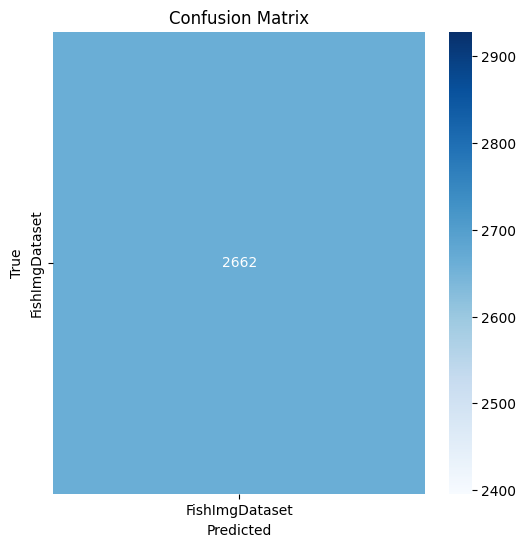

In [14]:

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

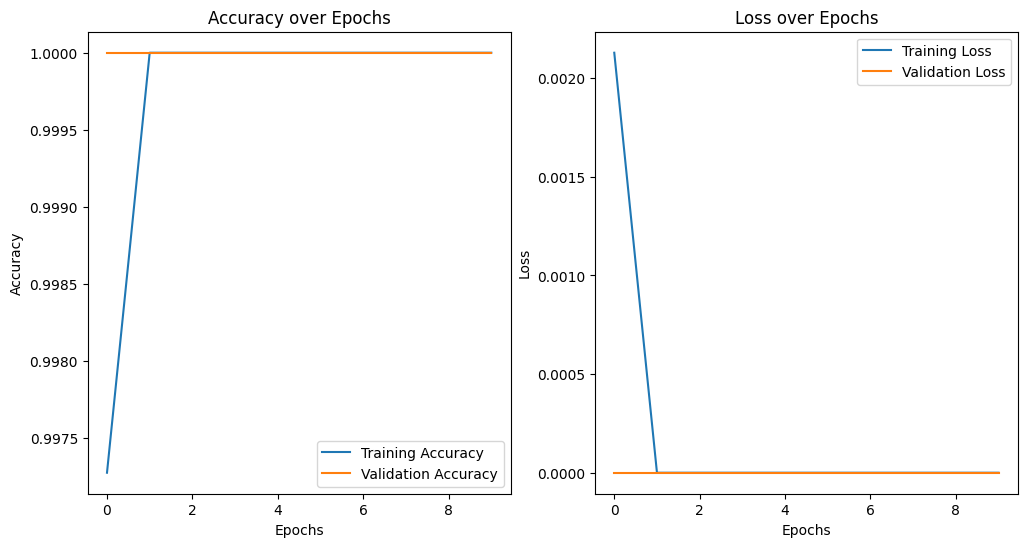

In [15]:

# 6. Visualisasi Hasil dengan Diagram
# Visualisasi Akurasi dan Loss selama Pelatihan
plt.figure(figsize=(12, 6))

# Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


84/84 ━━━━━━━━━━━━━━━━━━━━ 59s 698ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


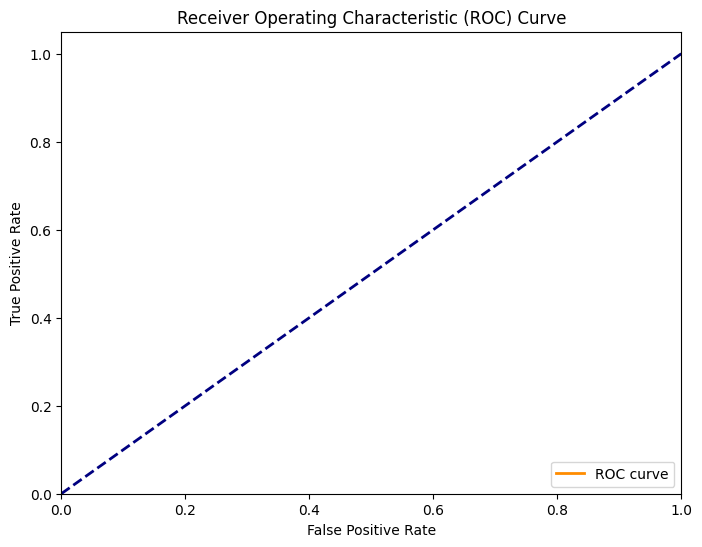

In [22]:
# 7. AUC-ROC
# Menghitung probabilitas positif untuk AUC-ROC
y_pred_prob = model.predict(validation_generator)

# Menghitung fpr, tpr dan threshold untuk AUC
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)

# Plot AUC-ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Garis diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [19]:
y_pred_prob = model.predict(validation_generator)
print(np.unique(y_pred_prob))  # Mengecek apakah output model bervariasi


84/84 ━━━━━━━━━━━━━━━━━━━━ 65s 768ms/step
[0.00000000e+00 3.52568291e-38 2.56403382e-37 4.43241870e-37
 1.16302087e-36 1.00191794e-35 1.62022054e-31 4.90144883e-30
 1.04891995e-28 2.81190996e-28 8.01081557e-28 3.43576349e-27]
